In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-04-14 16:26:58,019 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-14 16:26:58,020 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-04-14 16:26:58,021 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-14 16:26:58,021 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-04-14 16:26:58,021 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

yt : [INFO     ] 2022-04-14 16:26:58,405 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-04-14 16:26:58,408 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:26:59,063 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-04-14 16:26:59,159 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:26:59,160 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:26:59,160 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:26:59,160 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022


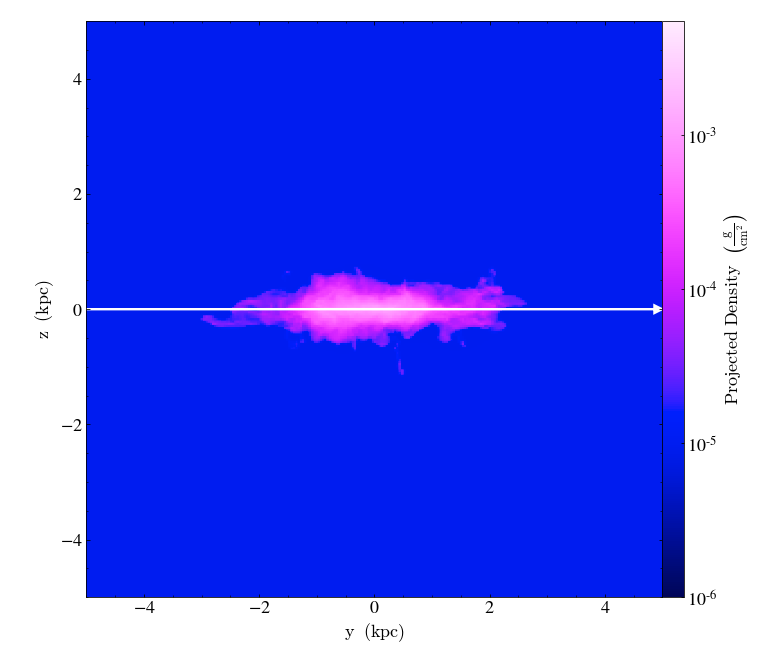

yt : [INFO     ] 2022-04-14 16:27:06,095 Projection completed
yt : [INFO     ] 2022-04-14 16:27:06,095 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 16:27:06,095 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 16:27:06,096 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 16:27:06,096 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 16:27:06,097 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: inval


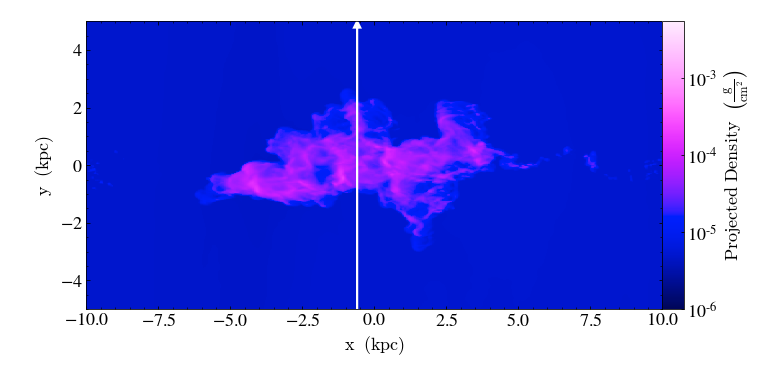

yt : [INFO     ] 2022-04-14 16:27:09,141 Projection completed
yt : [INFO     ] 2022-04-14 16:27:09,141 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 16:27:09,142 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 16:27:09,142 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 16:27:09,142 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 16:27:09,144 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


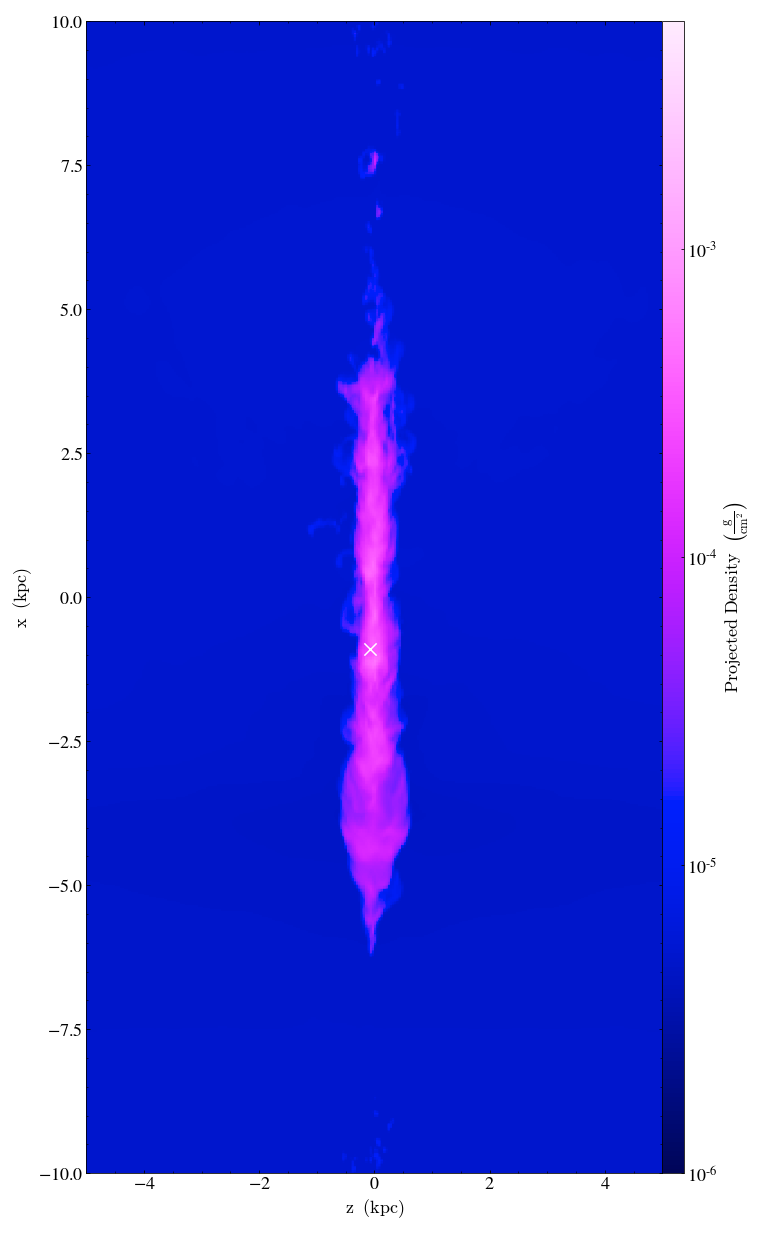

In [4]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5)

px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((-0.07,-0.9), coord_system="plot", plot_args={"color":"white", "s": 150})
py.show()

# 1D Histograms

In [13]:
def hist_den(x0,y0,z0,x,y,z,ion_, ionden_, ionfrac_, bins_):
    k = (3.086E+21)*10
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k


    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray.h5',
                                 lines='all',
                                 ftype='gas')

    trident.add_ion_fields(ray, ions=[ion_], ftype="gas", particle_type=False)
    
    vol = np.array(ray.all_data()[('gas', 'cell_volume')])
    den = np.array(ray.all_data()['density'])
    ion_den = np.array(ray.all_data()[ionden_])
    norm_mass = (den*vol)/M_sun
    norm_ion_mass = (ion_den*vol)/M_sun # Finish fixing these
    
    gas_bin = 10**np.linspace(np.log10(np.max(den))-5,np.log10(np.max(den)),20)
    ion_bin = 10**np.linspace(np.log10(np.max(ion_den))-5,np.log10(np.max(ion_den)),20)
    
    fig = plt.figure(figsize=(12,10))

    p1= fig.add_subplot(2,2,1)
    plt.hist(den, bins=bins_, color='mediumvioletred', weights=norm_mass)
    # plt.xlim(-10**-27,10**-25)
#     plt.yscale('symlog')
    plt.title('All Gas', fontsize=16)
    plt.xlabel('Density $(g /cm^3)$', fontsize=14)
    plt.ylabel('Mass [$M_\odot$]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    p2= fig.add_subplot(2,2,2)
    plt.hist(ion_den, bins=bins_, color='midnightblue',weights=norm_ion_mass)
    # plt.xlim(-1.0E-27,9.0E-26)
#     plt.yscale('symlog')
    plt.title(ion_, fontsize=16)
    plt.xlabel('Density $(g /cm^3)$', fontsize=14)
    plt.ylabel(ion_+' '+'Mass [M$_\odot$]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    p3= fig.add_subplot(2,2,3)
    plt.hist(den, color='mediumvioletred', weights=norm_mass, log=True, bins=gas_bin)
    # plt.xlim(-10**-27,10**-25)
    plt.xscale('log')
    plt.title('All Gas (Log Scale)', fontsize=16)
    plt.xlabel('Density $(g /cm^3)$', fontsize=14)
    plt.ylabel('Mass [$M_\odot$]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    p4= fig.add_subplot(2,2,4)
    plt.hist(ion_den, color='midnightblue',weights=norm_ion_mass, log=True, bins=ion_bin)
    # plt.xlim(-1.0E-27,9.0E-26)
#     plt.yscale('symlog')
    plt.title(ion_+' (Log Scale)', fontsize=16)
    plt.xlabel('Density $(g /cm^3)$', fontsize=14)
    plt.ylabel(ion_+' '+'Mass [M$_\odot$]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xscale('log')
    
    plt.tight_layout(pad= 3)

    return den, ion_den

yt : [INFO     ] 2022-04-14 16:41:44,629 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:41:44,632 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:41:45,117 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:41:45,194 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:41:45,195 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:41:45,195 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:41:45,195 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:41:45,196 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:41:45,203 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:41:45,207 Ide

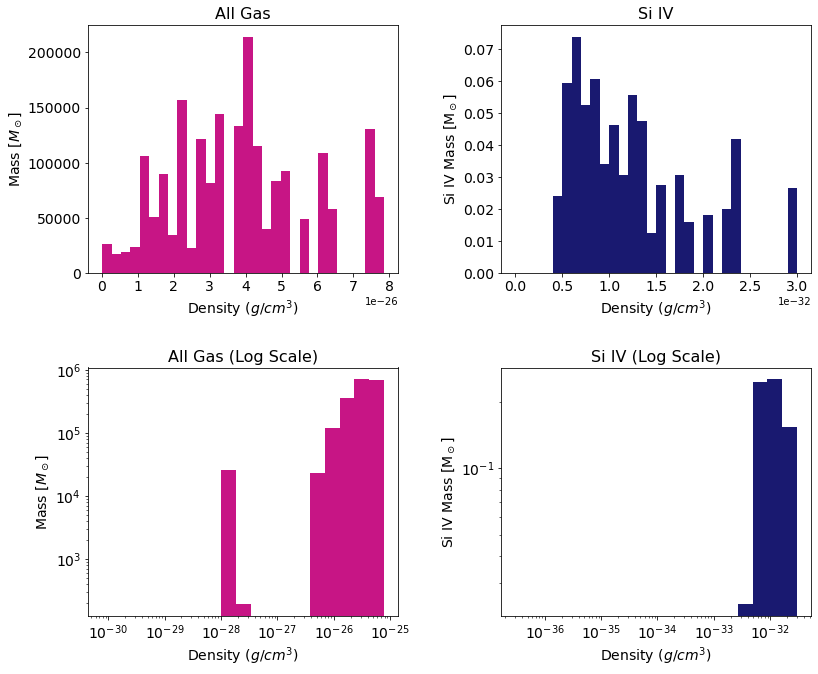

In [14]:
Si4 = hist_den(0.94,0,.5,.94,1,.5,'Si IV','Si_p3_density', 'Si_p3_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:43:52,006 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:43:52,008 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:43:52,493 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:43:52,570 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:43:52,571 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:43:52,571 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:43:52,571 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:43:52,572 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:43:52,579 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:43:52,583 Ide

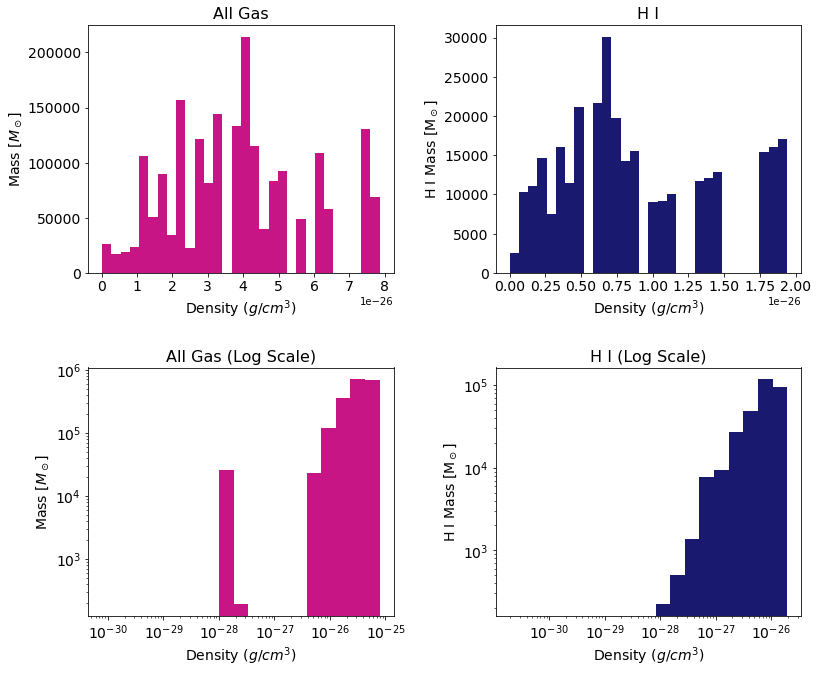

In [15]:
HI = hist_den(0.94,0,.5,.94,1,.5,'H I','H_p0_density','H_p0_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:44:29,508 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:44:29,511 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:44:29,993 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:44:30,070 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:44:30,071 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:44:30,071 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:44:30,071 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:44:30,072 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:44:30,079 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:44:30,083 Ide

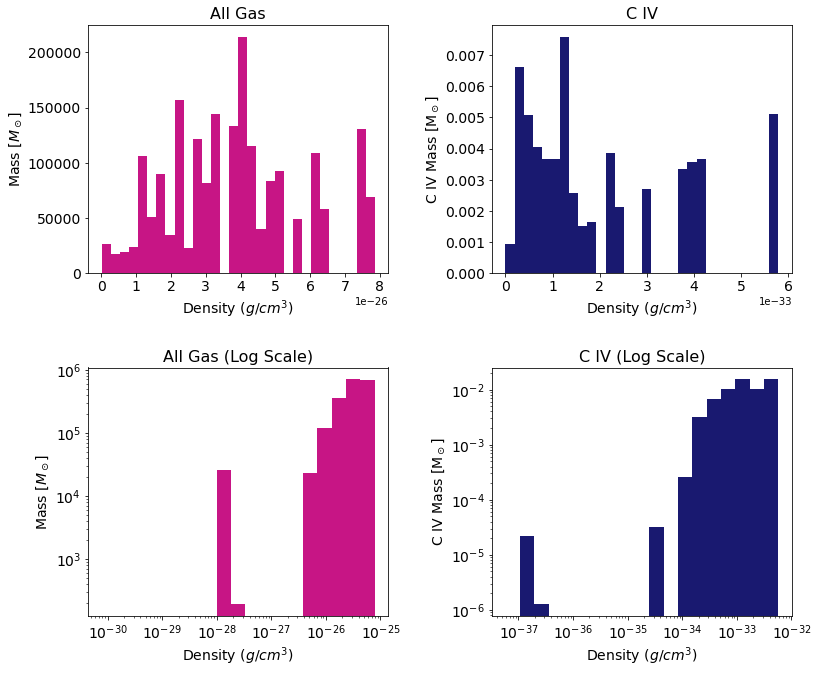

In [17]:
C4 = hist_den(0.94,0,.5,.94,1,.5,'C IV','C_p3_density','C_p3_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:45:35,706 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:45:35,709 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:45:36,193 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:45:36,269 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:45:36,269 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:45:36,270 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:45:36,270 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:45:36,270 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:45:36,278 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:45:36,281 Ide

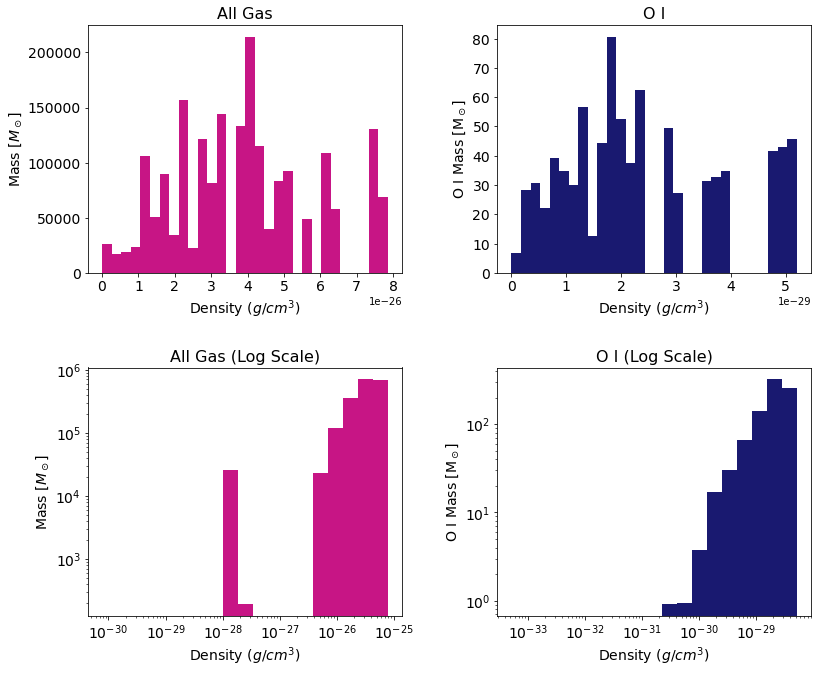

In [18]:
O1 = hist_den(0.94,0,.5,.94,1,.5,'O I','O_p0_density', 'O_p0_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:45:51,176 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:45:51,179 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:45:51,664 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:45:51,741 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:45:51,741 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:45:51,741 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:45:51,742 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:45:51,742 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:45:51,749 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:45:51,753 Ide

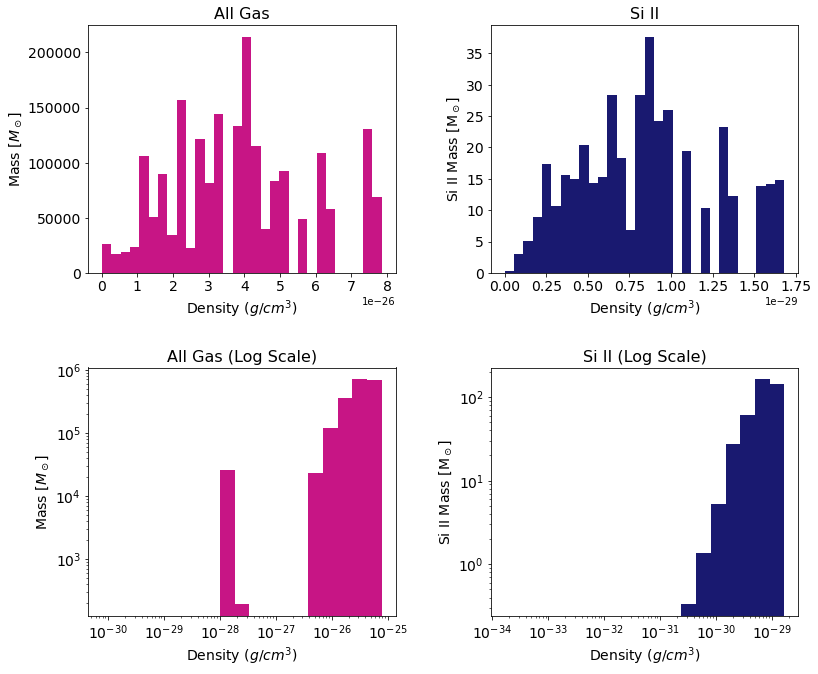

In [19]:
Si2 = hist_den(0.94,0,.5,.94,1,.5,'Si II','Si_p1_density','Si_p1_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:46:18,162 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:46:18,164 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:46:18,644 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:46:18,720 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:46:18,721 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:46:18,721 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:46:18,721 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:46:18,722 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:46:18,729 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:46:18,732 Ide

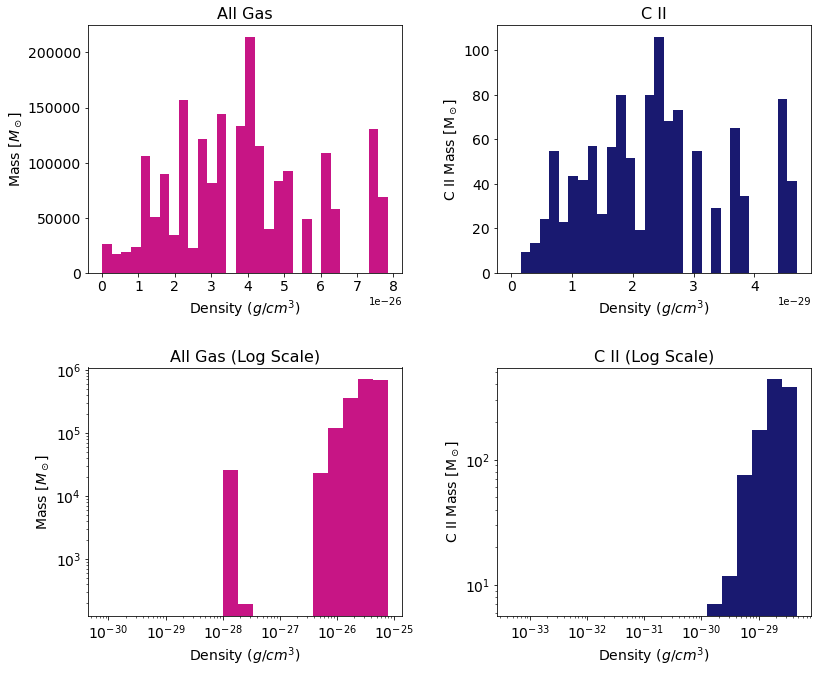

In [20]:
C2 = hist_den(0.94,0,.5,.94,1,.5,'C II','C_p1_density','C_p1_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:47:56,239 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:47:56,241 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:47:56,719 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:47:56,800 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:47:56,800 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:47:56,800 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:47:56,801 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:47:56,801 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:47:56,809 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:47:56,814 Ide

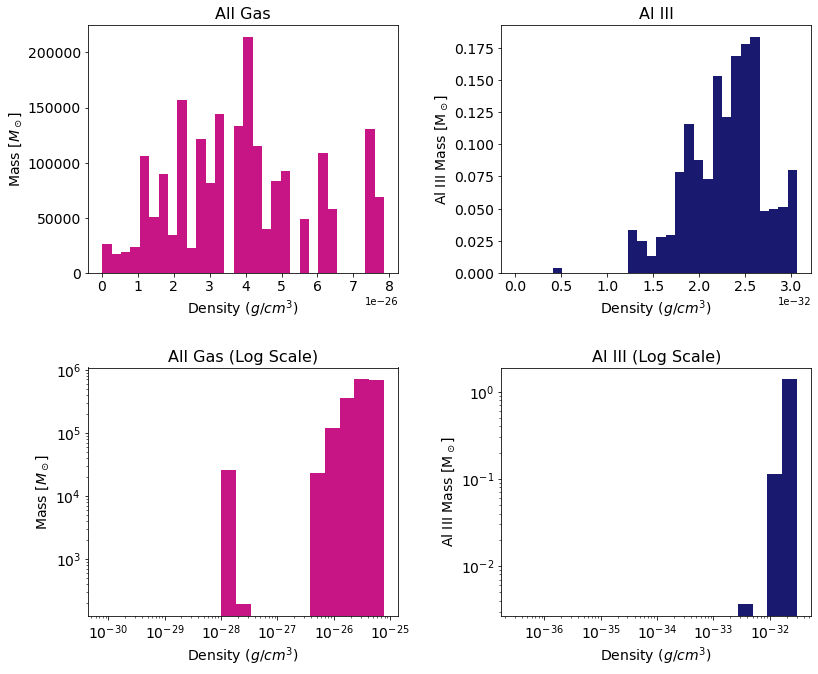

In [22]:
Al3 = hist_den(0.94,0,.5,.94,1,.5,'Al III','Al_p2_density','Al_p2_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:47:58,113 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:47:58,115 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:47:58,579 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:47:58,656 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:47:58,656 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:47:58,657 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:47:58,657 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:47:58,657 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:47:58,665 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:47:58,669 Ide

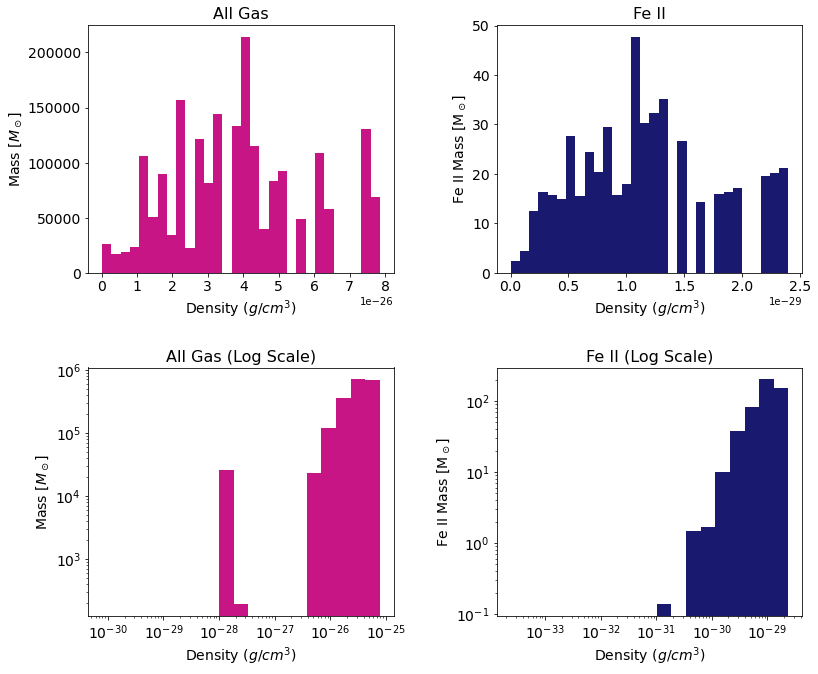

In [23]:
Fe2 = hist_den(0.94,0,.5,.94,1,.5,'Fe II','Fe_p1_density','Fe_p1_ion_fraction', 30)

yt : [INFO     ] 2022-04-14 16:52:02,198 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-04-14 16:52:02,200 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 16:52:02,724 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-04-14 16:52:02,800 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 16:52:02,801 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 16:52:02,801 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 16:52:02,801 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-04-14 16:52:02,802 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-04-14 16:52:02,809 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-14 16:52:02,813 Ide

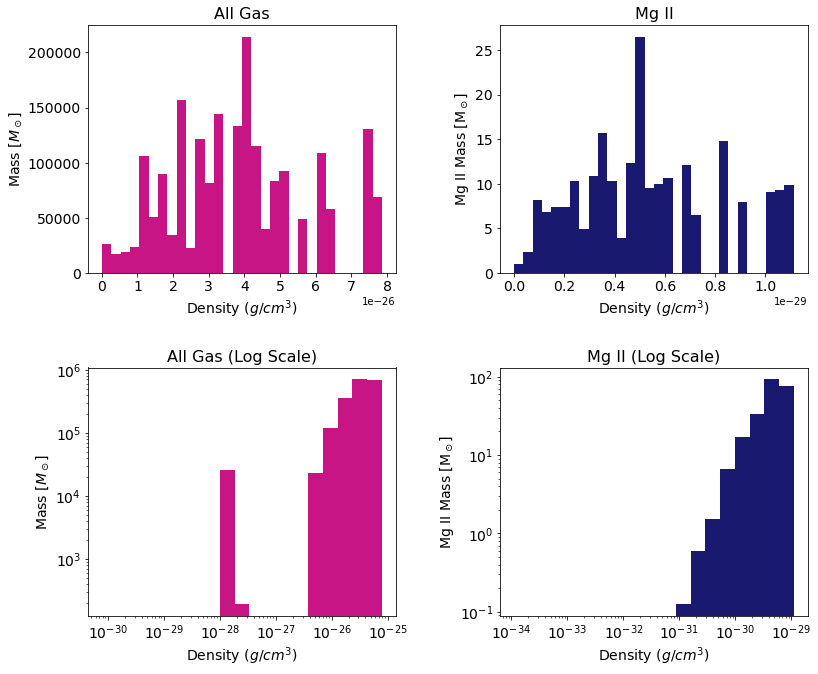

In [25]:
Mg2 = hist_den(0.94,0,.5,.94,1,.5,'Mg II','Mg_p1_density','Mg_p1_ion_fraction', 30)

In [52]:
# change density to mass then divide by M_sun and weight by that
# Ion fraction plots for different ions of the same element
# Try binning in Log

In [24]:
# x = gas den
# y = ion mass